In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [2]:
# Load dataset
file_path = '/content/credit_risk_dataset.csv'
data = pd.read_csv(file_path)

print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None

Sample Data

In [3]:
data['person_home_ownership'] = data['person_home_ownership'].map({'RENT': 0, 'OWN': 1, 'MORTGAGE': 2})
data['loan_intent'] = data['loan_intent'].map({'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5})
data['loan_grade'] = data['loan_grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

In [4]:
data = data.dropna()

In [5]:
print("\nCleaned Data:")
print(data.head())


Cleaned Data:
   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                    0.0              123.0   
1          21           9600                    1.0                5.0   
2          25           9600                    2.0                1.0   
3          23          65500                    0.0                4.0   
4          24          54400                    0.0                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            0           4      35000          16.02            1   
1            1           2       1000          11.14            0   
2            2           3       5500          12.87            1   
3            2           3      35000          15.23            1   
4            2           3      35000          14.27            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                       


Analysis for column: person_age
Descriptive Statistics:
count    28544.000000
mean        27.729926
std          6.310022
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


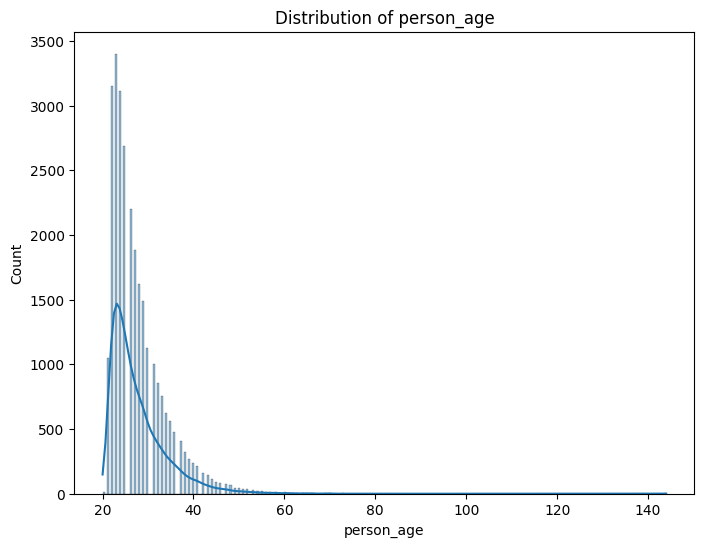

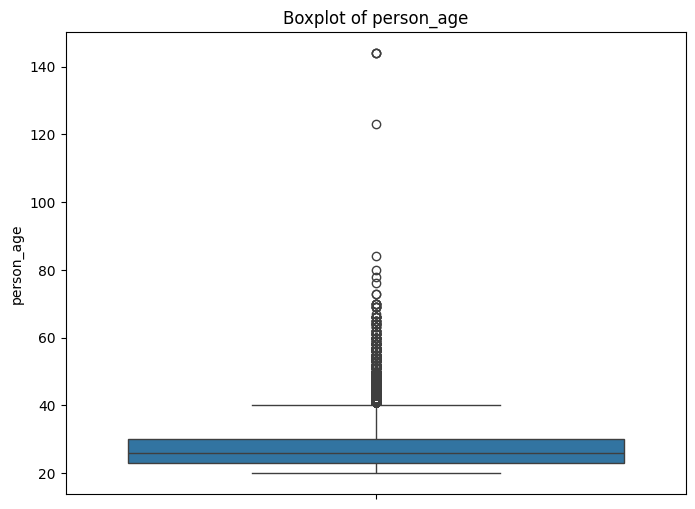


Analysis for column: person_income
Descriptive Statistics:
count    2.854400e+04
mean     6.660844e+04
std      6.225809e+04
min      4.000000e+03
25%      3.942900e+04
50%      5.580600e+04
75%      8.000000e+04
max      6.000000e+06
Name: person_income, dtype: float64


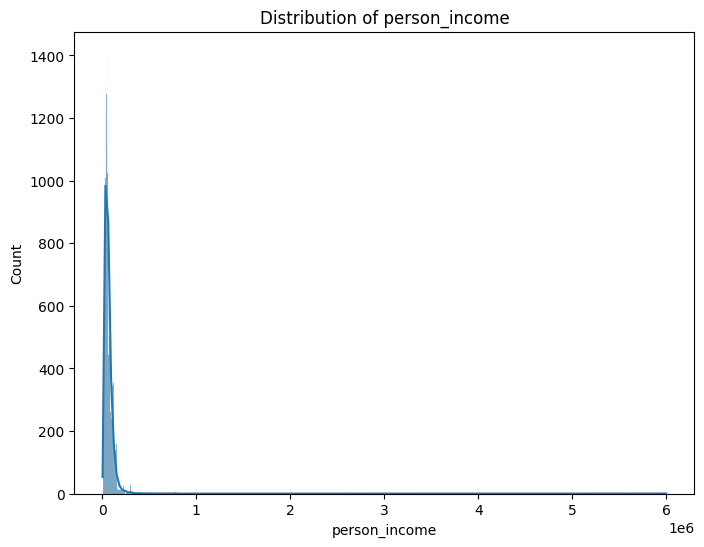

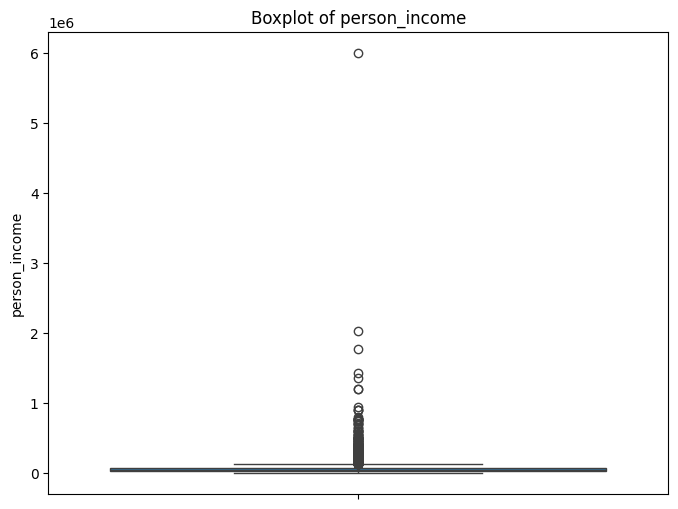


Analysis for column: person_home_ownership
Descriptive Statistics:
count    28544.000000
mean         0.903658
std          0.956011
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          2.000000
Name: person_home_ownership, dtype: float64


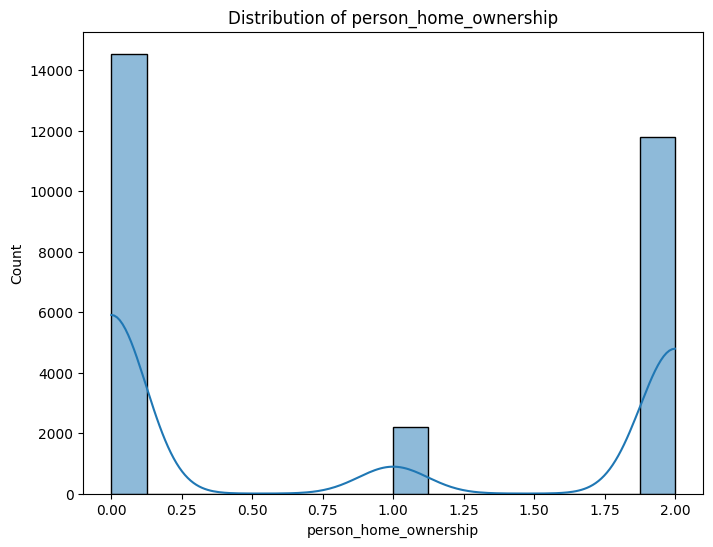

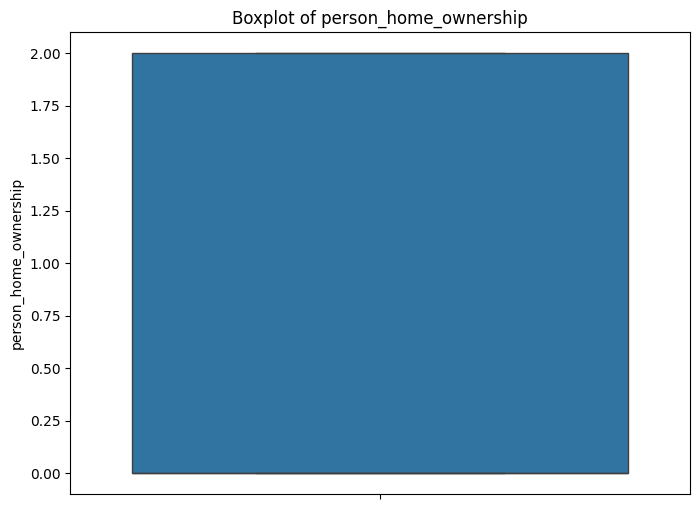


Analysis for column: person_emp_length
Descriptive Statistics:
count    28544.000000
mean         4.791795
std          4.154918
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64


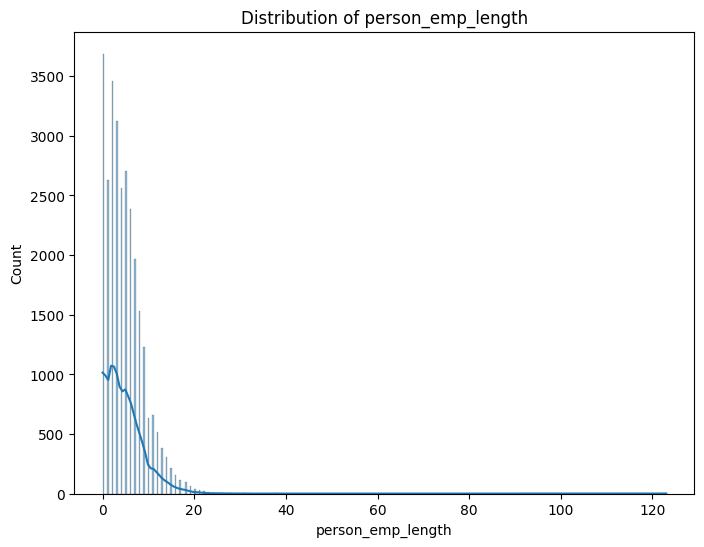

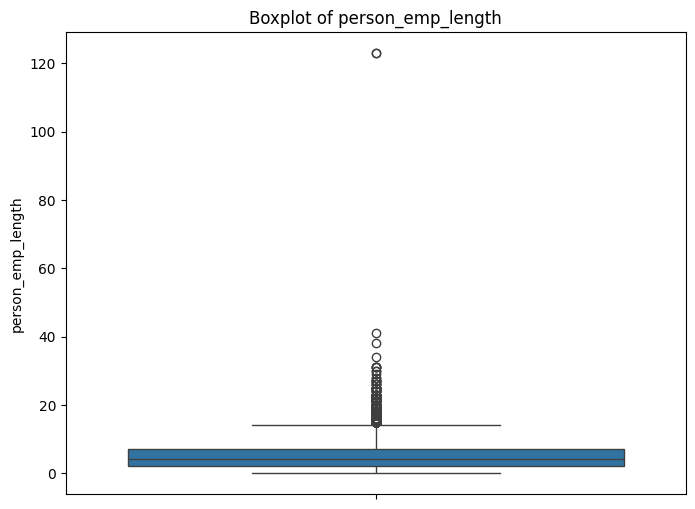


Analysis for column: loan_intent
Descriptive Statistics:
count    28544.000000
mean         2.336008
std          1.680361
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: loan_intent, dtype: float64


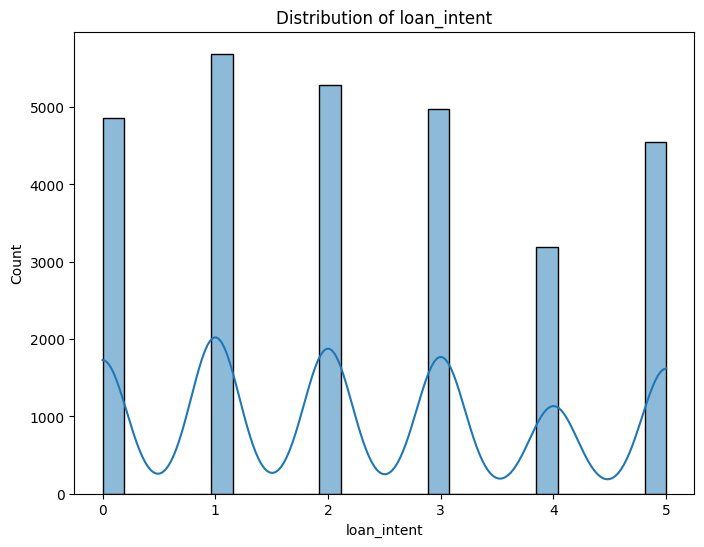

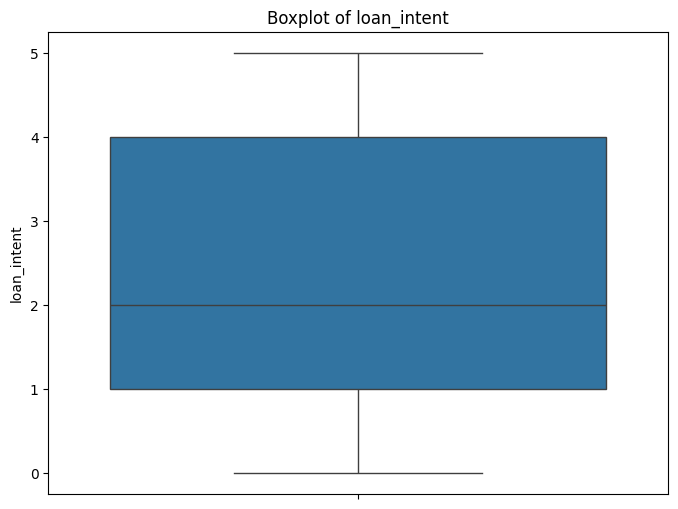


Analysis for column: loan_grade
Descriptive Statistics:
count    28544.000000
mean         2.227158
std          1.170099
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: loan_grade, dtype: float64


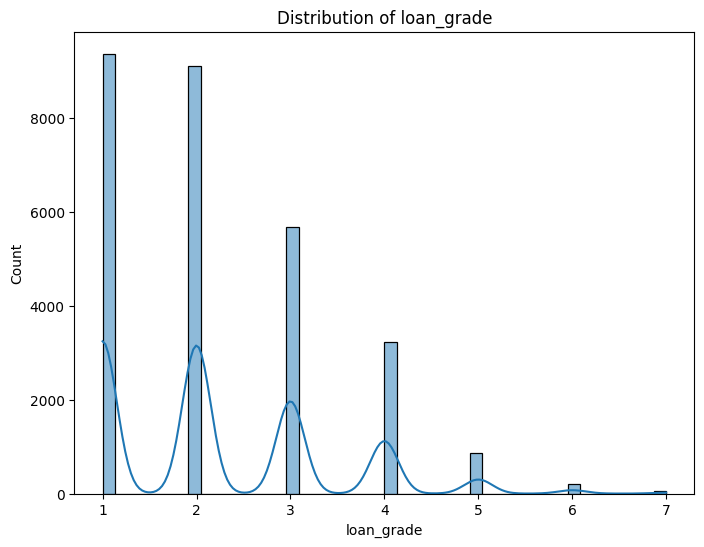

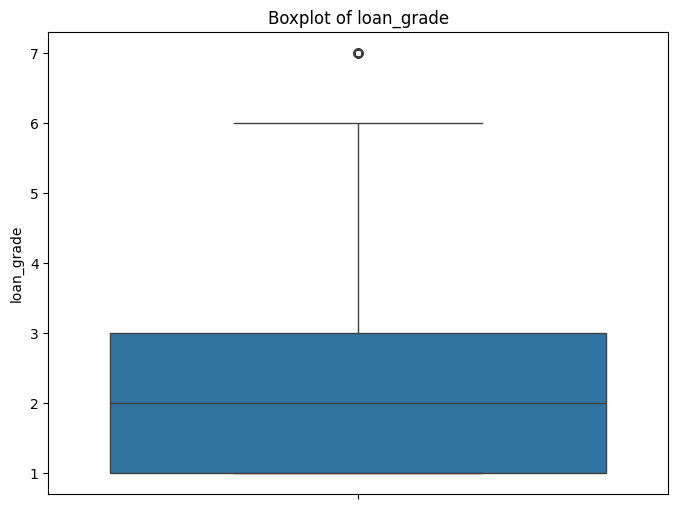


Analysis for column: loan_amnt
Descriptive Statistics:
count    28544.000000
mean      9651.643953
std       6330.216310
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12500.000000
max      35000.000000
Name: loan_amnt, dtype: float64


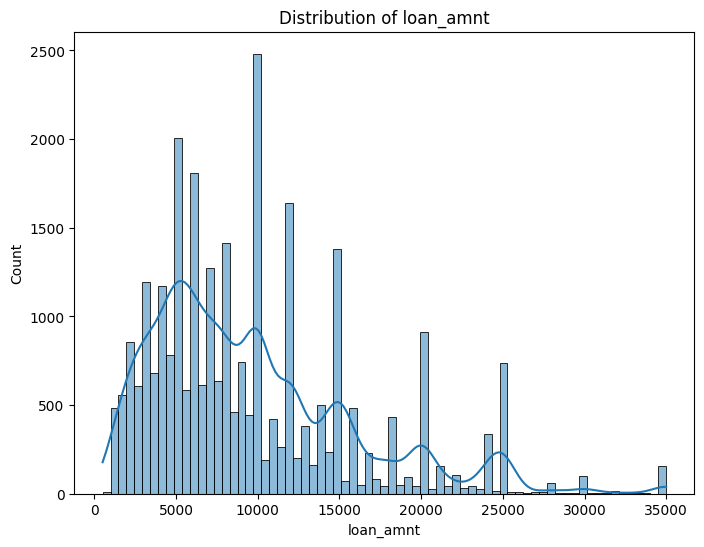

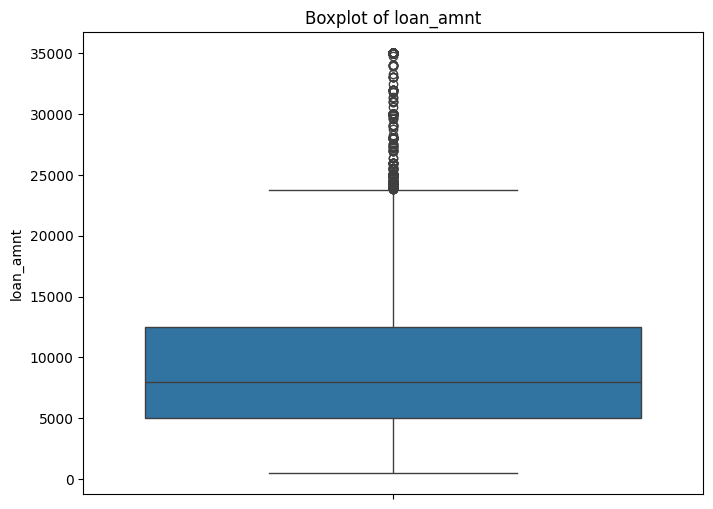


Analysis for column: loan_int_rate
Descriptive Statistics:
count    28544.000000
mean        11.036604
std          3.230713
min          5.420000
25%          7.900000
50%         10.990000
75%         13.480000
max         23.220000
Name: loan_int_rate, dtype: float64


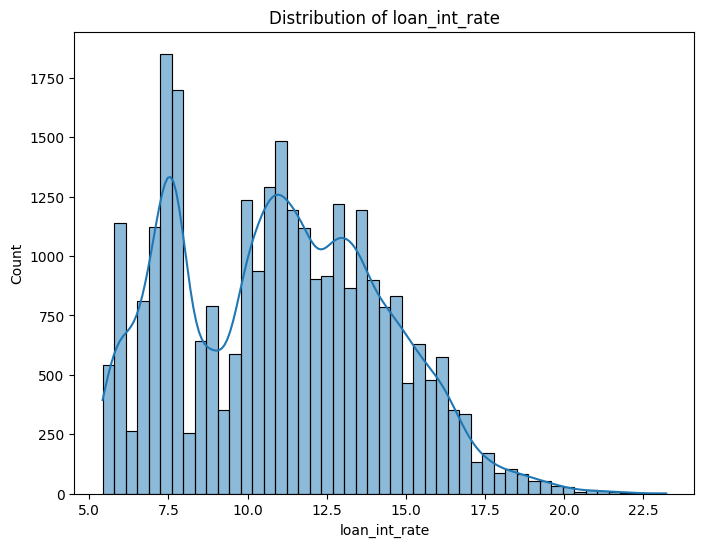

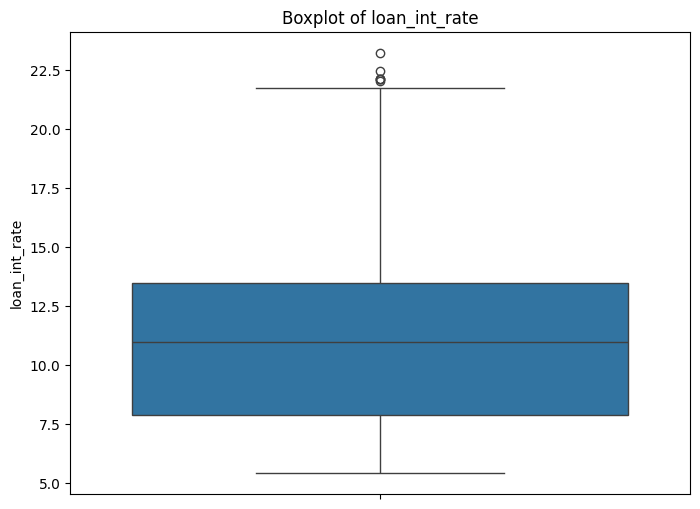


Analysis for column: loan_status
Descriptive Statistics:
count    28544.000000
mean         0.216368
std          0.411775
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64


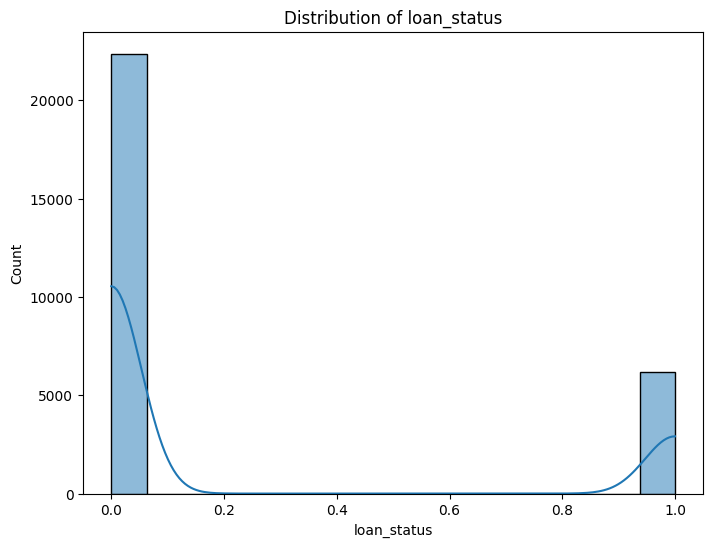

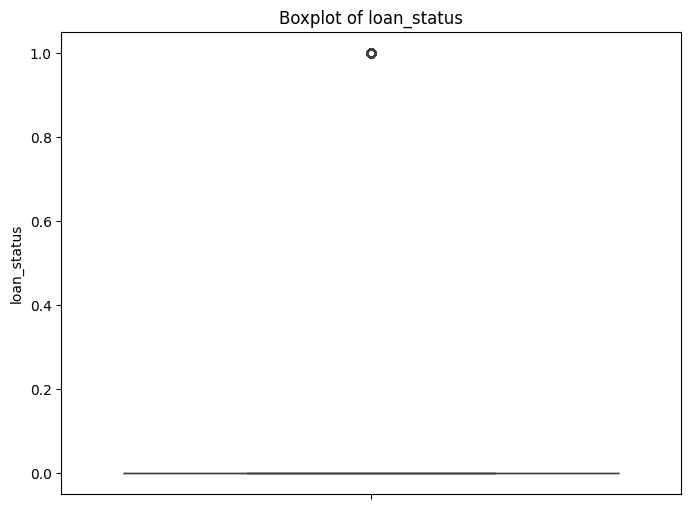


Analysis for column: loan_percent_income
Descriptive Statistics:
count    28544.000000
mean         0.169422
std          0.106367
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64


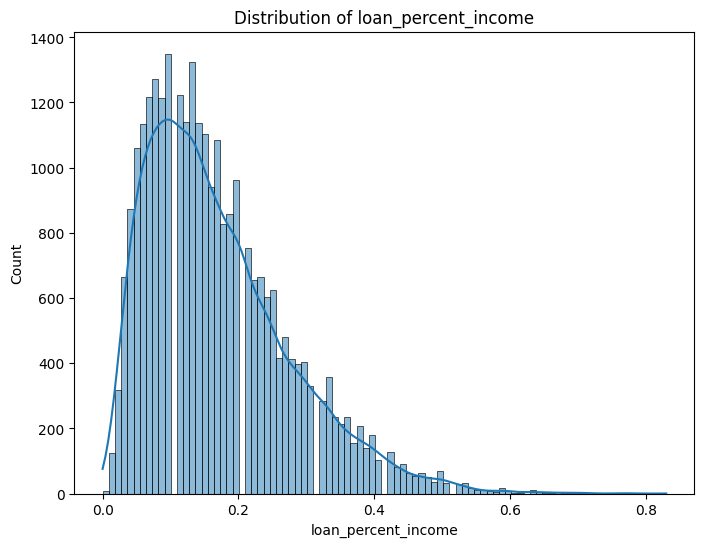

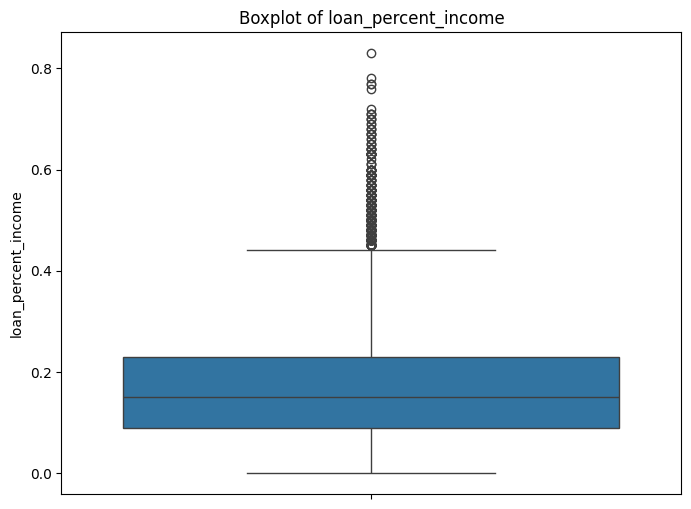


Analysis for column: cb_person_default_on_file
Descriptive Statistics:
count    28544.000000
mean         0.177971
std          0.382495
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: cb_person_default_on_file, dtype: float64


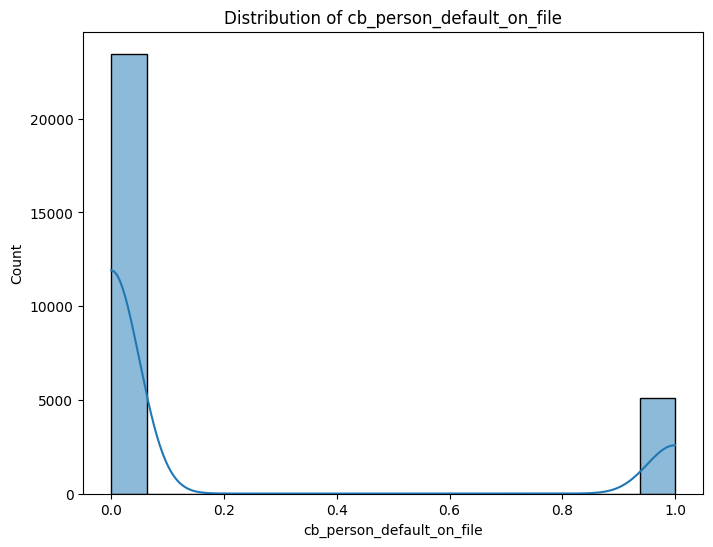

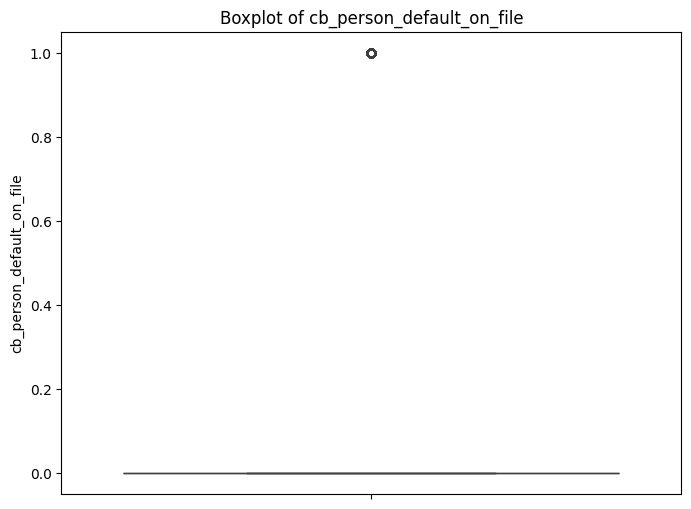


Analysis for column: cb_person_cred_hist_length
Descriptive Statistics:
count    28544.000000
mean         5.795158
std          4.038846
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


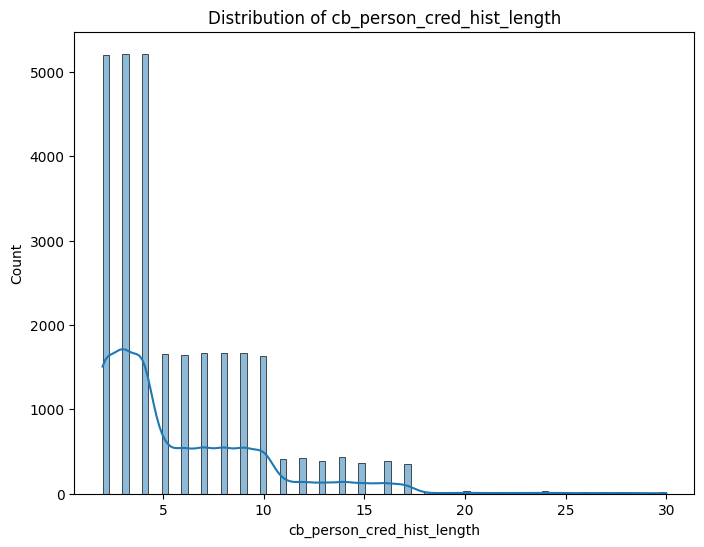

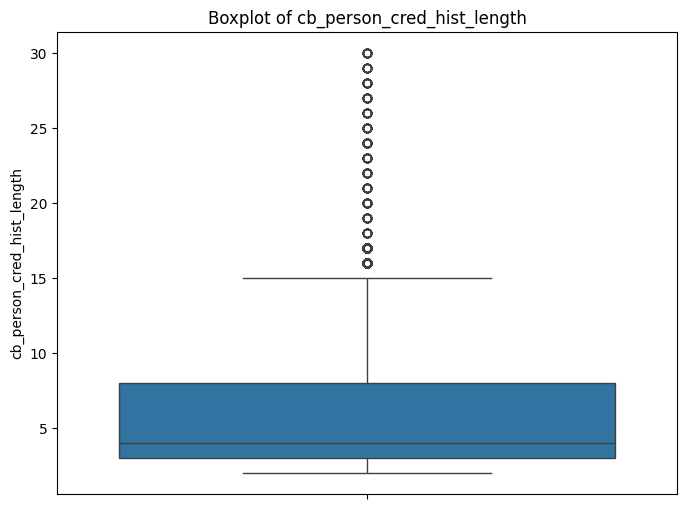

In [6]:
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    print(f"\nAnalysis for column: {col}")
    print(f"Descriptive Statistics:\n{data[col].describe()}")
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

categorical_cols = data.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    print(f"\nAnalysis for column: {col}")
    print(f"Value Counts:\n{data[col].value_counts()}")
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

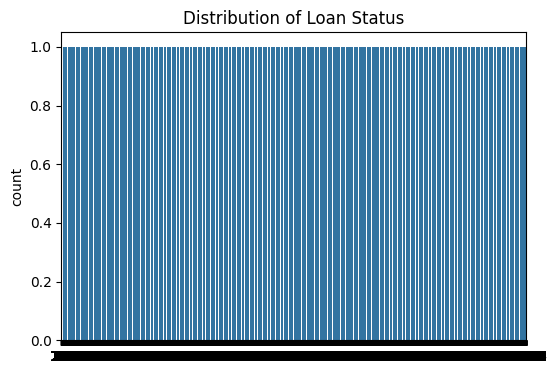

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data['loan_status'])
plt.title("Distribution of Loan Status")
plt.show()

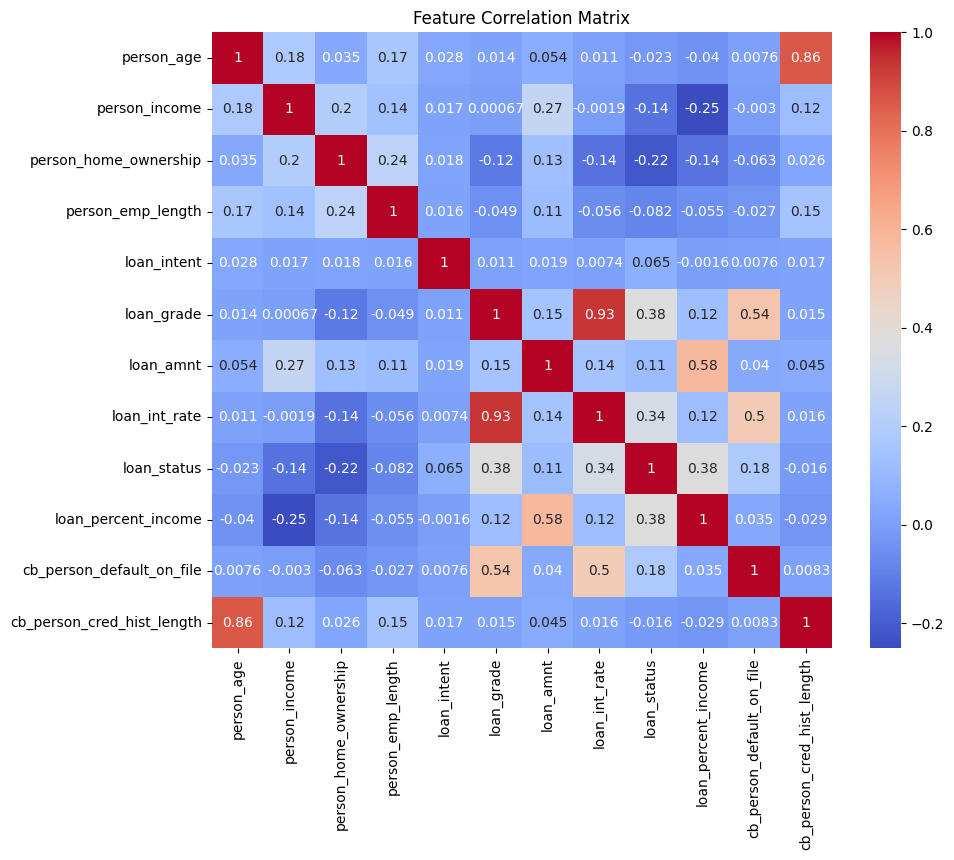

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y.value_counts())

loan_status
0    22368
1     6176
Name: count, dtype: int64


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)


Class distribution after oversampling:
loan_status
1    4966
0    4966
Name: count, dtype: int64


RandomForestClassifier(random_state=42)

In [9]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

joblib.dump(best_model, 'random_forest_model.pkl')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy of the best model: 0.8502630513961958
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1261
           1       0.88      0.80      0.84      1210

    accuracy                           0.85      2471
   macro avg       0.85      0.85      0.85      2471
weighted avg       0.85      0.85      0.85      2471

[[1135  126]
 [ 244  966]]


['random_forest_model.pkl']

In [10]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

svm_model.fit(X_train_resampled, y_train_resampled)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of the SVM model: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

joblib.dump(svm_model, 'svm_model.pkl')

Accuracy of the SVM model: 0.6924322136786726
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1261
           1       0.72      0.61      0.66      1210

    accuracy                           0.69      2471
   macro avg       0.70      0.69      0.69      2471
weighted avg       0.70      0.69      0.69      2471

[[973 288]
 [472 738]]


['svm_model.pkl']

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_resampled, y_train_resampled)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of the Decision Tree model: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

joblib.dump(dt_model, 'decision_tree_model.pkl')

Accuracy of the Decision Tree model: 0.8235532173209227
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1261
           1       0.81      0.84      0.82      1210

    accuracy                           0.82      2471
   macro avg       0.82      0.82      0.82      2471
weighted avg       0.82      0.82      0.82      2471

[[1021  240]
 [ 196 1014]]


['decision_tree_model.pkl']

In [13]:
from google.colab import files
data.to_csv('cleaned_credit_risk_dataset.csv', index=False)
files.download('cleaned_credit_risk_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>